<a href="https://colab.research.google.com/github/AtaruOhto/pytorch_learning/blob/master/005_basic_pytorch_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

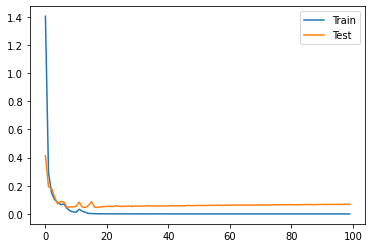

In [27]:
"""
ニューラルネットワークを深くすればするほど、表現力は高まるが、過学習しやすくなってしまう。

参考: https://www.shoeisha.co.jp/book/detail/9784798157184
"""

import torch
from torch import nn, optim
from  torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
X = digits.data
Y = digits.target

# 20%をテスト用に。残りのデータを学習用に用いる。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

d = 100

net = nn.Sequential(
    nn.Linear(64, d),
    nn.ReLU(),
    nn.Linear(d, d),
    nn.ReLU(),    
    nn.Linear(d, d),
    nn.ReLU(),
    nn.Linear(d, d),
    nn.ReLU(),
    nn.Linear(d, 10)
)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

data_set = TensorDataset(X_train, Y_train)

loader = DataLoader(data_set, batch_size=32, shuffle=True)

train_losses = []
test_losses = []

for _ in range(100):
  running_loss = 0.0
  for i, (xx, yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_function(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  train_losses.append(running_loss / i)
  y_pred = net(X_test)
  test_loss = loss_function(y_pred, Y_test)
  test_losses.append(test_loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")
plt.legend(loc='upper right')


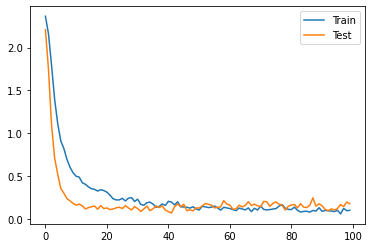

In [38]:
"""
Dropout

問題: モデルの表現力が高すぎて過学習が起きてしまう。
方策: Dropoutでモデルの表現力を抑制する。

PyTorchの訓練モードと検証モード
"""

import torch
from torch import nn, optim
from  torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
X = digits.data
Y = digits.target

# 20%をテスト用に。残りのデータを学習用に用いる。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

d = 100

# Dropoutを適用して、幾つかのユニットをランダムで使用しないことにより、モデルの表現力を抑制する。
model = nn.Sequential(
    nn.Linear(64, d),
    nn.ReLU(),
    # ユニットを使用しない確率: 50%
    nn.Dropout(0.5),
    nn.Linear(d, d),
    nn.ReLU(), 
    # ユニットを使用しない確率: 50%
    nn.Dropout(0.5),
    nn.Linear(d, d),
    nn.ReLU(),
    # ユニットを使用しない確率: 50%
    nn.Dropout(0.5),    
    nn.Linear(d, d),
    nn.ReLU(),
    # ユニットを使用しない確率: 50%
    nn.Dropout(0.5),    
    nn.Linear(d, 10)
)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

data_set = TensorDataset(X_train, Y_train)

loader = DataLoader(data_set, batch_size=32, shuffle=True)

train_losses = []
test_losses = []

for _ in range(100):
  running_loss = 0.0
  # ニューラルネットワークを訓練モードにする
  model.train()
  for i, (xx, yy) in enumerate(loader):
    y_pred = model(xx)
    loss = loss_function(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss / i)

  # ニューラルネットワークを検証モードにする
  # https://stackoverflow.com/questions/53879727/pytorch-how-to-deactivate-dropout-in-evaluation-mode
  # Dropoutを検証時に無効化する。(モデルの訓練時のみDropoutを発動させる。)
  model.eval()  
  y_pred = model(X_test)
  test_loss = loss_function(y_pred, Y_test)
  test_losses.append(test_loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")
plt.legend(loc='upper right')


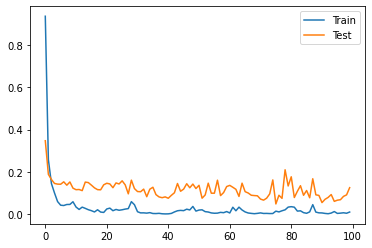

In [42]:
"""
Batch Normalization

問題: 事前にデータを正規化(「平均が0、分散が1になるようにデータを整える」)しても学習が進んでいくにつれ、ニューラルネットワークを進むにつれてどんどんデータの分布がバラけてくる。そうしてくると、学習が不安定になりやすい。
方策: Batch Normalizationで学習を安定化・高速化させる
"""

"""
Dropout

問題: モデルの表現力が高すぎて過学習が起きてしまう。
方策: Dropoutでモデルの表現力を抑制する。

PyTorchの訓練モードと検証モード
"""



import torch
from torch import nn, optim
from  torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digits = load_digits()
X = digits.data
Y = digits.target

# 20%をテスト用に。残りのデータを学習用に用いる。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

d = 100

# 訓練データと予測データの入力の分布に乖離があり、モデルがうまく対応できなくなる問題に対応
model = nn.Sequential(
    nn.Linear(64, d),
    nn.ReLU(),
    # Batch Normalization
    nn.BatchNorm1d(d),
    nn.Linear(d, d),
    nn.ReLU(), 
    # Batch Normalization
    nn.BatchNorm1d(d),
    nn.Linear(d, d),
    nn.ReLU(),
    # Batch Normalization
    nn.BatchNorm1d(d),  
    nn.Linear(d, d),
    nn.ReLU(),
    # Batch Normalization
    nn.BatchNorm1d(d),  
    nn.Linear(d, 10)
)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

data_set = TensorDataset(X_train, Y_train)

loader = DataLoader(data_set, batch_size=32, shuffle=True)

train_losses = []
test_losses = []

for _ in range(100):
  running_loss = 0.0
  # ニューラルネットワークを訓練モードにする
  model.train()
  for i, (xx, yy) in enumerate(loader):
    y_pred = model(xx)
    loss = loss_function(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss / i)

  # ニューラルネットワークを検証モードにする
  # Dropoutと同じく 訓練時のみBatch Normalizationを発動させる。
  model.eval()  
  y_pred = model(X_test)
  test_loss = loss_function(y_pred, Y_test)
  test_losses.append(test_loss.item())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Train")
plt.plot(test_losses, label="Test")
plt.legend(loc='upper right')



